# Packe installation

In [1]:
from models.models import test
a = 10
test(a)

hi 10


In [7]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install ipyplot


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install openpyxl

     -------------------------------------- 242.1/242.1 kB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade setuptools

     ---------------------------------------- 1.2/1.2 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade distlib

     -------------------------------------- 468.5/468.5 kB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Imports 

### global

In [2]:
from pdfminer.layout    import LAParams#, LTTextBox
from pdfminer.pdfpage   import PDFPage
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.converter import TextConverter
from pdfminer.layout    import LTTextBoxHorizontal,LTTextLine,LTTextLineHorizontal,LTLine,LTRect,LTFigure
from pdfminer.utils     import open_filename
from io                 import StringIO
import textdistance   
import pandas as pd
import warnings
import pdfminer       
import json
from numpy import random
import inspect
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import uuid

ModuleNotFoundError: No module named 'pdfminer'

### local

In [2]:
from utils.extract_pdf_elements import pdfDF

## Create logger 

In [3]:
import os
import logging

logging.shutdown()

try:
    os.remove("logs.log")
except:
    pass
logging.basicConfig(filename = 'logs.log',
                    level = logging.DEBUG,
                    format = '%(asctime)s:%(levelname)s:%(name)s:%(message)s')


# Test Layout extractor

## Get dataframe

In [3]:
columns = ['page','item','BBOX','text','size','sx','sy','ex','ey','tag','parenttag']
pdf = 'Runnymede.pdf'
PDF = pdfDF(pdf,columns)
df = PDF.get_DF()

Processing page 22....


In [5]:
#test that data frame is extracted correclty 
df.head(12)

,page,item,BBOX,text,size,sx,sy,ex,ey,tag,parenttag
0,1,LTTextBoxHorizontal,"(304.25, 785.52, 546.316, 797.52)",Con29 Enquiries of Local Authority (2016),"[0, 0, 595.32, 841.92]",304.25,785.52,546.316,797.52,53830cc8-bccd-45af-b4b5-6e1ad44933d7,NaN
1,1,LTTextLineHorizontal,"(304.25, 785.52, 546.316, 797.52)",Con29 Enquiries of Local Authority (2016),"[0, 0, 595.32, 841.92]",304.25,785.52,546.316,797.52,28d4ba34-91c7-4a35-a67b-c1f965a770d9,53830cc8-bccd-45af-b4b5-6e1ad44933d7
2,1,LTTextBoxHorizontal,"(309.65, 739.4884000000001, 550.90888, 772.508...",Reference: 12048873 \nUPRN: \nSearch Site:...,"[0, 0, 595.32, 841.92]",309.65,739.4884,550.90888,772.5084,5774bb3f-cb02-4147-8b11-060c021c5c1a,NaN
3,1,LTTextLineHorizontal,"(309.65, 762.5484, 422.47888, 772.5083999999999)",Reference: 12048873,"[0, 0, 595.32, 841.92]",309.65,762.5484,422.47888,772.5084,d75932fa-126c-45d9-9313-0a25bda107da,5774bb3f-cb02-4147-8b11-060c021c5c1a
4,1,LTTextLineHorizontal,"(309.65, 751.0284, 343.51888, 760.9884)",UPRN:,"[0, 0, 595.32, 841.92]",309.65,751.0284,343.51888,760.9884,9dd4baae-42b9-42ec-a4e9-276448b9dcc6,5774bb3f-cb02-4147-8b11-060c021c5c1a
5,1,LTTextLineHorizontal,"(309.65, 739.4884000000001, 550.90888, 749.4484)",Search Site: 58 Preston Avenue Alfreton DE55...,"[0, 0, 595.32, 841.92]",309.65,739.4884,550.90888,749.4484,3e62e277-ef73-4f60-8ba7-f4ed66278316,5774bb3f-cb02-4147-8b11-060c021c5c1a
6,1,LTTextBoxHorizontal,"(375.19, 751.0284, 449.95888, 760.9884)",100030007484,"[0, 0, 595.32, 841.92]",375.19,751.0284,449.95888,760.9884,d3b8b9e9-4785-4278-bc73-ac773781903b,NaN
7,1,LTTextLineHorizontal,"(375.19, 751.0284, 449.95888, 760.9884)",100030007484,"[0, 0, 595.32, 841.92]",375.19,751.0284,449.95888,760.9884,68be24bf-c013-4486-bf45-c256548d0964,d3b8b9e9-4785-4278-bc73-ac773781903b
8,1,LTTextBoxHorizontal,"(304.25, 718.8484000000001, 357.07888, 728.8084)",Search No:,"[0, 0, 595.32, 841.92]",304.25,718.8484,357.07888,728.8084,03b6ae9d-8d0f-4d88-9cf6-1237babf66c9,NaN
9,1,LTTextLineHorizontal,"(304.25, 718.8484000000001, 357.07888, 728.8084)",Search No:,"[0, 0, 595.32, 841.92]",304.25,718.8484,357.07888,728.8084,db1a034e-7d17-4beb-a878-611b0d2389e9,03b6ae9d-8d0f-4d88-9cf6-1237babf66c9


In [4]:
df_text = df.query(f"page==7 and item=='LTTextLineHorizontal'")
text = ''
for ix,row in df_text.iterrows():
    # print(row['/text'])
    text = text + row['text'] +' '
print(text)

3.06(a) Permanent stopping up or diversion 3.06(a) Please see the Highway Replies from Surrey County Council which answers all parts of this 3.06(b) enquiry. Waiting or loading restrictions 3.06(b) Please see the Highway Replies from Surrey County Council. 3.06(c) One-way driving 3.06(c) Please see the Highway Replies from Surrey County Council. 3.06(d) Prohibition of driving 3.06(d) Please see the Highway Replies from Surrey County Council. 3.06(e) Pedestrianisation 3.06(e) Please see the Highway Replies from Surrey County Council. 3.06(f) Vehicle width or weight restriction 3.06(f) Please see the Highway Replies from Surrey County Council. 3.06(g) Traffic calming works e.g. road humps 3.06(g) Please see the Highway Replies from Surrey County Council. 3.06(h) Residents parking controls 3.06(h) Please see the Highway Replies from Surrey County Council. 3.06(i) Minor road widening or improvement 3.06(i) Please see the Highway Replies from Surrey County Council. 3.06(j) Pedestrian crossi

## Query Functions 
lets get something from df 

In [7]:
# Get text lines in a page 
def get_textlines_in_page(df = df, page=1):
    df_temp = df.query(f"page=={page} and item=='LTTextLineHorizontal'")
    return df_temp
# example
# g = get_textlines_in_page(df = df, page=2)
# g.head(10)

# Get textboxes in a page 
def get_textboxes_in_page(df = df, page=1):
    df_temp = df.query(f"page=={page} and item=='LTTextBoxHorizontal'")
    return df_temp

# get lines in a page
def get_lines_in_page(df = df, page=1):
    df_temp = df.query(f"page=={page} and item=='LTLine'")
    return df_temp
# example
# l = get_texlines_in_page(df = df, page=12)
# l.head(10)

#get rectangles in a page 
def get_rects_in_page(df = df, page=1):
    df_temp = df.query(f"page=={page} and item=='LTRect'")
    return df_temp

# Drawings 

## Test drawing

In [17]:
# img = np.zeros((842,596), np.uint8)
# # Draw a diagonal blue line with thickness of 5 px (0, 0, 595.32, 841.92)


# BBOX = df.iloc[0]['BBOX']
# Size = df.iloc[0]['size']
# # print(BBOX,Size) ####################### uncomment to see outputs 

# rsx = int(np.floor(BBOX[0]))
# rsy = int(np.floor(Size[3])-np.floor(BBOX[1]))
# rex = int(np.floor(BBOX[2]))
# rey = int(np.floor(Size[3])-np.floor(BBOX[3]))
# cv.rectangle(img,(rsx,rsy),(rex,rey), (255,0,0),1)
# # plt.imshow(img) ######################## uncomment to see outputs 

In [8]:
def  draw(img,BBOX,Size,randomcolor:bool):
    rsx = int(np.floor(BBOX[0]))
    rsy = int(np.floor(Size[3])-np.floor(BBOX[1]))
    rex = int(np.floor(BBOX[2]))
    rey = int(np.floor(Size[3])-np.floor(BBOX[3]))
    
    if (randomcolor):
        R = random.randint(20, 255)
        G = random.randint(20, 255)
        B = random.randint(20, 255)
    else:
        R = 255
        G = 255
        B = 255
    # cv.rectangle(img,(rsx,rsy),(rex,rey), (red,green,0),1)
    cv.rectangle(img,(rsx,rsy),(rex,rey), (B,G,R),1)

In [18]:
# num_page = df['Page'].max()
# print('number of page is {}'.format(num_page))
# for p in range(num_page):
#     page= p+1
#     page_df= df.loc[df['Page']==page]
#     page_size=page_df.iloc[0]['size']
#     img = np.zeros((int(page_size[3]),int(page_size[2])), np.uint8)
#     for row in page_df.itertuples(index=False):
#         if (row.Item == 'LTLine') or (row.Item == 'LTRect') : 
#             # print(page)
#             draw(img,row.BBOX,row.size,randomcolor=True)
#     plt.figure(page)
#     plt.title(page)
#     plt.imshow(img)
    
    


## Draw text line BBOX

Amber.pdf
processed page number is 5


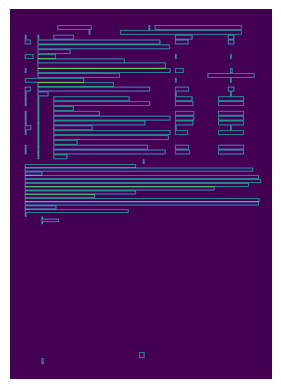

In [9]:
page = 5
df_temp = get_textlines_in_page(df = df, page = page)
if df_temp.shape[0]:
    page_size=df_temp.iloc[0]['size']
    img = np.zeros((int(page_size[3]),int(page_size[2])), np.uint8)
    for row in df_temp.itertuples(index=False):
        draw(img,row.BBOX,row.size,randomcolor=False)
    print(pdf)
    print(f"processed page number is {page}")
    plt.axis('off')
    plt.imshow(img)
    plt.savefig('foo.png')
else:
    print('not textlines in this page')

## Draw Textbox BBOX

Amber.pdf
processed page number is 4


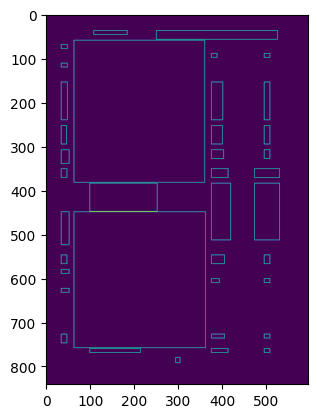

In [11]:
page = 4
df_temp = get_textboxes_in_page(df = df, page = page)


if df_temp.shape[0]:
    page_size=df_temp.iloc[0]['size']
    img = np.zeros((int(page_size[3]),int(page_size[2])), np.uint8)
    for row in df_temp.itertuples(index=False):
        draw(img,row.BBOX,row.size,randomcolor=False)
    print(pdf)
    print(f"processed page number is {page}")
    plt.imshow(img)
    plt.savefig('foo.png')
else:
    print('not textlines in this page')

## Draw  line 

hart3.pdf
processed page number is 2


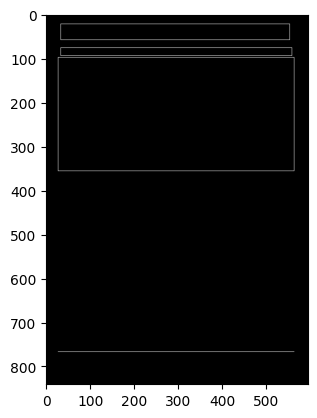

In [48]:
page = 2
df_temp = get_lines_in_page(df = df, page = page)
 
if df_temp.shape[0]:

    page_size=df_temp.iloc[0]['size']
    img = np.zeros((int(page_size[3]),int(page_size[2]),3), np.uint8)

    for row in df_temp.itertuples(index=False):
        draw(img,row.BBOX,row.size,randomcolor=False)

    print(pdf)
    print(f"processed page number is {page}")
    
    plt.imshow(img[...,::-1])
    cv.imwrite('color_img.jpg', img)
else:
    print('not textlines in this page')

## Draw Rectangles in a page

processed page 2 in pdf file: hart3.pdf


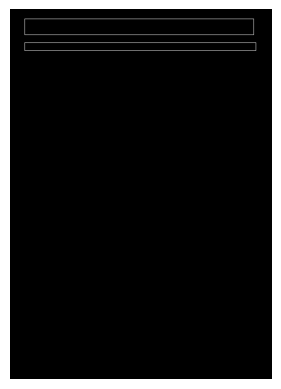

In [40]:
page = 2
df_temp = get_rects_in_page(df = df, page = page)


if df_temp.shape[0]:
    page_size=df_temp.iloc[0]['size']
    img = np.zeros((int(page_size[3]),int(page_size[2]),3), np.uint8)
    for row in df_temp.itertuples(index=False):
        draw(img,row.BBOX,row.size,randomcolor=False)
    print(f"processed page {page} in pdf file: {pdf}")
    cv.imwrite('color_img.jpg', img)
    plt.imshow(img[...,::-1])
    plt.axis('off')
else:
    print('not textlines in this page')

(27.900000000000002, 743.6, 563.7, 743.6)
(563.7, 485.95000000000005, 563.7, 743.6)
(27.900000000000002, 485.95000000000005, 563.7, 485.95000000000005)
(27.900000000000002, 485.95000000000005, 27.900000000000002, 743.6)
(27.3, 74.35000000000001, 563.5500000000001, 74.35000000000001)
(33.300000000000004, 819.4000000000001, 553.5, 819.4000000000001)
(553.5, 783.5, 553.5, 819.4000000000001)
(33.300000000000004, 783.5, 553.5, 783.5)
(33.300000000000004, 783.5, 33.300000000000004, 819.4000000000001)
(33.300000000000004, 765.4000000000001, 558.3000000000001, 765.4000000000001)
(558.3000000000001, 747.5, 558.3000000000001, 765.4000000000001)
(33.300000000000004, 747.5, 558.3000000000001, 747.5)
(33.300000000000004, 747.5, 33.300000000000004, 765.4000000000001)
processed page 2 in pdf file: hart3.pdf
------
(33.300000000000004, 783.5, 553.5, 819.4000000000001)
(33.300000000000004, 747.5, 558.3000000000001, 765.4000000000001)
processed page 2 in pdf file: hart3.pdf


(-0.5, 594.5, 840.5, -0.5)

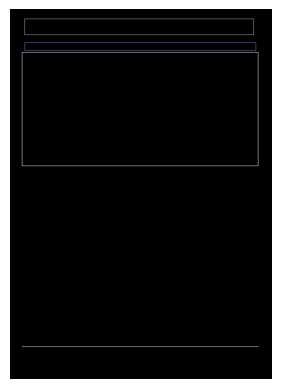

In [51]:
page = 2
df_temp1 = get_lines_in_page(df = df, page = page)
df_temp2 = get_rects_in_page(df = df, page = page)
if df_temp1.shape[0]:
    page_size=df_temp1.iloc[0]['size']
    img = np.zeros((int(page_size[3]),int(page_size[2]),3), np.uint8)
    for row in df_temp1.itertuples(index=False):
        draw(img,row.BBOX,row.size,randomcolor=False)
        print(row.BBOX)
    print(f"processed page {page} in pdf file: {pdf}")
    
else:
    print('not textlines in this page')
print('------')    
if df_temp2.shape[0]:
    # page_size=df_temp2.iloc[0]['size']
    # img = np.zeros((int(page_size[3]),int(page_size[2]),3), np.uint8)
    for row in df_temp2.itertuples(index=False):
        draw(img,row.BBOX,row.size,randomcolor=True)
        print(row.BBOX)
    print(f"processed page {page} in pdf file: {pdf}")
    
else:
    print('not textlines in this page')
    

cv.imwrite('color_img.jpg', img)
plt.imshow(img[...,::-1])
plt.axis('off')

# Functions

## Extract elements function

In [1]:
import numpy as np
a = np.nan


In [7]:
%%writefile utils/extract_pdf_elements.py

from IPython.display import clear_output

from pdfminer.layout    import LAParams#, LTTextBox
from pdfminer.pdfpage   import PDFPage
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.converter import TextConverter
from pdfminer.layout    import LTTextBoxHorizontal,LTTextLine,LTTextLineHorizontal,LTLine,LTRect,LTFigure,LTImage
from pdfminer.utils     import open_filename
from io                 import StringIO
from pdfminer.image import ImageWriter
from pdfminer.high_level import extract_pages

import textdistance   
import pandas as pd
import warnings
import pdfminer       
import json
import uuid

import inspect
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


class pdfDF():   
    def __init__(self,pdf,columns):
        self.pdf = pdf
        self.columns = columns
        
    def add_row_to_df(self,pageid,item,mediabox,text,df,tag=np.nan,parenttag=np.nan):
#         if not tag:
#             tag = np.nan
#         if not childtag:
#             childtag = np.nan
            
        new_row=pd.Series({    'page':pageid,
                               'item':type(item).__name__,
                               'BBOX':item.bbox,
                               'text':text,
                               'size':mediabox,
                               'sx':item.bbox[0],
                               'sy':item.bbox[1],
                               'ex':item.bbox[2],
                               'ey':item.bbox[3],
                               'tag': tag,
                               'parenttag': parenttag,
                               
                              })
        df = pd.concat([df, new_row.to_frame().T], ignore_index=True)   
        return df  
        
    def get_pages(self):
        document = open(self.pdf, 'rb')
        self.rsrcmgr = PDFResourceManager()
        self.laparams = LAParams() # Set parameters for analysis.
        self.device = PDFPageAggregator(self.rsrcmgr, laparams=self.laparams)# Create a PDF page aggregator object.
        self.interpreter = PDFPageInterpreter(self.rsrcmgr, self.device)
        self.pages = PDFPage.get_pages(document)
        

        
    def get_DF(self):
        nontext = 'nonetext'
        self.get_pages()
        self.df = pd.DataFrame(columns=self.columns)
        #prcocess pages and store data in the dataframe 
        
        for page in self.pages:
                #process current page
                self.interpreter.process_page(page)
                layout = self.device.get_result()# receive the LTPage object for the page.
                # print(  ' ---------------------------  \n',f"|          page {layout.pageid}          |",'\n ---------------------------  \n')
                clear_output(wait=True)
                print(f"Processing page {layout.pageid}....")
                for item in layout:
                    if isinstance(item,LTTextBoxHorizontal):
                        textboxid = str(uuid.uuid4())
                        text = item.get_text().strip()
                        text = text.encode('utf-8').decode('ascii', 'ignore')
                        self.df = self.add_row_to_df(pageid=layout.pageid,item=item,mediabox=page.mediabox,text=text,df = self.df,tag = textboxid)
                        for line in item:
                                # print('      child tex lines')
                                if isinstance(line,LTTextLineHorizontal):
                                    # print('      child tex lines')
                                    textlineid = str(uuid.uuid4())
                                    text = line.get_text().strip()
                                    text = text.encode('utf-8').decode('ascii', 'ignore')
                                    self.df = self.add_row_to_df(pageid=layout.pageid,item=line,mediabox=page.mediabox,text=text,df = self.df,tag = textlineid, parenttag=textboxid )
                    elif isinstance(item,LTFigure):
                        text = nontext
                        self.df = self.add_row_to_df(pageid=layout.pageid,item=item,mediabox=page.mediabox,text=text,df = self.df)
                        for fig in item:
                            if isinstance(fig,LTImage):
                                text=nontext
                                self.df = self.add_row_to_df(pageid=layout.pageid,item=fig,mediabox=page.mediabox,text=text,df = self.df)
                        
                    else:
                        try:
                            text = item.get_text().strip()
                            text = text.encode('utf-8').decode('ascii', 'ignore')
                            self.df = self.add_row_to_df(pageid=layout.pageid,item=item,mediabox=page.mediabox,text=text,df = self.df)

                        except:
                            text = nontext
                            self.df = self.add_row_to_df(pageid=layout.pageid,item=item,mediabox=page.mediabox,text=text,df = self.df)
        return self.df      

    def get_image(layout_object):
        if isinstance(layout_object, pdfminer.layout.LTImage):
            return layout_object
        if isinstance(layout_object, pdfminer.layout.LTContainer):
            for child in layout_object:
                return get_image(child)
        else:
            return None
    
    def get_images(self,output_dir):
        self.get_pages()
        for page in self.pages:
            images = list(filter(bool, map(self.get_image(), page)))
            iw = ImageWriter(output_dir)
            for image in images:
                iw.export_image(image)
            

Overwriting utils/extract_pdf_elements.py


## Using the df class 

In [2]:
from utils.extract_pdf_elements import pdfDF

In [18]:
#create data frame columns

pdf = 'hart3.pdf'

In [4]:
from utils.extract_pdf_elements import pdfDF

pdf = 'hart3.pdf'
PDF = pdfDF(pdf,columns)


In [8]:
df.to_excel('results.xlsx')

<hr size="10" >

# Tests

## code for saving images in a pdf file

In [2]:
# STEP 1
# import libraries
import fitz # PyMuPDF
import io
from PIL import Image

# STEP 2
# file path you want to extract images from
file = 'hart3.pdf'

# open the file
pdf_file = fitz.open(file)

# STEP 3
# iterate over PDF pages
for page_index in range(len(pdf_file)):
    # get the page itself
    page = pdf_file[page_index]
    # get image list
    image_list = page.get_images()
    # printing number of images found in this page
    if image_list:
        print(f"[+] Found a total of {len(image_list)} images in page {page_index}")
    else:
        print("[!] No images found on page", page_index)
    for image_index, img in enumerate(image_list, start=1):
        # get the XREF of the image
        xref = img[0]
        # extract the image bytes
        base_image = pdf_file.extract_image(xref)
        image_bytes = base_image["image"]
        # get the image extension
        image_ext = base_image["ext"]
        # load it to PIL
        image = Image.open(io.BytesIO(image_bytes))
        # save it to local disk
        image.save(open(f"images/image{page_index+1}_{image_index}.{image_ext}", "wb"))

[+] Found a total of 2 images in page 0
[!] No images found on page 1
[!] No images found on page 2
[!] No images found on page 3
[!] No images found on page 4
[!] No images found on page 5
[!] No images found on page 6
[!] No images found on page 7
[!] No images found on page 8
[!] No images found on page 9
[!] No images found on page 10
[!] No images found on page 11
[!] No images found on page 12
[!] No images found on page 13
[!] No images found on page 14
[!] No images found on page 15
[!] No images found on page 16
[!] No images found on page 17
[!] No images found on page 18
[!] No images found on page 19
[!] No images found on page 20
[!] No images found on page 21
[!] No images found on page 22
[!] No images found on page 23
[!] No images found on page 24
[!] No images found on page 25
[!] No images found on page 26
[!] No images found on page 27
[!] No images found on page 28
[!] No images found on page 29
[!] No images found on page 30
[!] No images found on page 31
[!] No i

<hr size='5'>

## Find similar iamges

In [3]:
pip install sewar

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 40.1/40.1 MB 9.5 MB/s eta 0:00:00
  Created wheel for sewar: filename=sewar-0.4.5-py3-none-any.whl size=10583 sha256=24f72ecc3b4e1c231fc825035fd967b3fca08d0ff1842af54efe522e893cdaea
  Stored in directory: c:\users\ali.nadian\appdata\local\pip\cache\wheels\06\71\a0\ce363fc3bc7374b69963c517c1f570358f46e881cee13ae5b6
Successfully built sewar
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp

In [4]:
# LETS SAY WE PROCESSED A PDF FILE AND ALL THE IMAGES ARE STORED IN A FILE
# NOW SOME OF THESE PICTURES ARE THE SAME IF THERE IS MORE THAN ONE
# LETS CREATE A TABLE  AND DELETE THE ONES THAT ARE SIMILAR 
# FOR n IMAGES IN A FOLDER CREATE n*n MATRIX
import os
files=list(os.walk('images/'))
# folde_name = images


In [85]:
from PIL import Image
# num_images_in_pdf = 
import numpy 
def prepare_im(im_path:str,output_size:tuple):
    # IM = False
    try:
        im = Image.open(im_path).convert('L') 
        print('found image')
        
    except:
        print('cant read iamge')

    print(output_size)
    print(type(im))
    im = im.resize(output_size)
    im = numpy.array(im)   
    return im

image_path1 = os.path.join(files[0][0],files[0][2][2])
image_path2 = os.path.join(files[0][0],files[0][2][4])

im1 = prepare_im(image_path1,output_size=(100,100))
im2 = prepare_im(image_path2,output_size=(100,100))

image_Diff = {'mse':mse(im1,im2),
              'rmse':rmse(im1,im2),
             }

found image
(100, 100)
<class 'PIL.Image.Image'>
found image
(100, 100)
<class 'PIL.Image.Image'>


<hr size='10'>

7649.9597

### Line processing

In [40]:
p = np.array((0,0))
q = np.array((1,0))

print(p,q)

pq = q-p 
pq_norm = np.linalg.norm(pq)
pq_normal = np.array((-pq[1],pq[0]))/pq_norm
print(pq_normal)

def line

[0 0] [1 0]
[0. 1.]


In [29]:
p = (1-t)A + tB
q = (1-s)C + tD

(1-t)A+tB = (1-s)C+sD
t(B-A) + A = s(D-C) + c
#remove one variable using inner product of the normal vector property 
t (B-A).(D-C) = (c-A).(D-C)

t = ((C-A).(D-C))/((B-A).(D-C))

if t in [0 1] then intersection point is calculated from t



page                                                   12
item                                               LTLine
BBOX    (57.34999847, 505.20401002000006, 787.89998626...
text                                           textisnone
size                   [0, 0, 841.70001221, 595.45001221]
sx                                              57.349998
sy                                              505.20401
ex                                             787.899986
ey                                              505.20401
Name: 1149, dtype: object

### clear cell output 

In [9]:
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    
    print(i)

9


In [13]:
import uuid
A = str(uuid.uuid4())
A

'bef91dbf-d86e-4db4-9060-61d143fc975b'